Current solution in evaluation 9: (1.594, -0.407)
Current solution in evaluation 10: (1.594, -0.307)
Current solution in evaluation 13: (1.494, -0.407)
Current solution in evaluation 14: (1.494, -0.307)
Current solution in evaluation 25: (1.394, -0.207)
Current solution in evaluation 26: (1.394, -0.107)
Current solution in evaluation 29: (1.294, -0.207)
Current solution in evaluation 30: (1.294, -0.107)
Current solution in evaluation 41: (1.194, -0.007)
Current solution in evaluation 45: (1.094, -0.007)
Current solution in evaluation 57: (0.994, 0.093)
Current solution in evaluation 61: (0.894, 0.093)
Current solution in evaluation 73: (0.794, 0.193)
Current solution in evaluation 75: (0.794, -0.007)
Current solution in evaluation 77: (0.694, 0.193)
Current solution in evaluation 79: (0.694, -0.007)
Current solution in evaluation 89: (0.594, 0.093)
Current solution in evaluation 93: (0.494, 0.093)
Current solution in evaluation 105: (0.394, 0.193)
Current solution in evaluation 107: (0

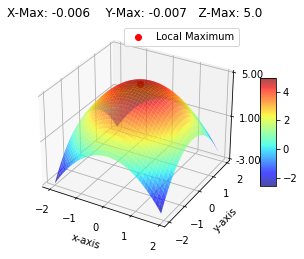

In [41]:
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib.pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt



def hill_climbing(initial_solution, evaluation, get_neighbors):
    evaluated_solutions = 0
    best_solution_x = initial_solution[0]
    best_solution_y = initial_solution[1]
    current_solution = initial_solution
    best_evaluation = evaluation(current_solution[0], current_solution[1])
    current_evaluation = evaluation(current_solution[0],current_solution[1])

    local_optimal_value = False
    while not local_optimal_value:
        neighbors_x, neighbors_y = get_neighbors(current_solution[0], current_solution[1])
        local_optimal_value = True
        for v_x in neighbors_x:
            for v_y in neighbors_y:
                evaluation_neighbor = evaluation(v_x,v_y)
                evaluated_solutions += 1
                if evaluation_neighbor > current_evaluation:
                    current_solution = v_x,v_y
                    current_evaluation = evaluation_neighbor
                    print(u"Current solution in evaluation {0}: {1}".format(
                        evaluated_solutions,(round(current_solution[0],7),round(current_solution[1],7))))
                    local_optimal_value = False
                    if best_evaluation > current_evaluation: 
                        best_solution = (current_solution[0], current_solution[1]) 
                        best_evaluation = current_evaluation
                           
    return current_solution, evaluated_solutions


def z_func(x,y):                         
    return 5-(x**2+y**2)


minimum_x = -2.0
minimum_y = -2.0
maximum_x = 2.0
maximum_y = 2.0

x = np.arange(minimum_x,maximum_x,0.1)
y = np.arange(minimum_y,maximum_y,0.1)
X,Y = meshgrid(x, y)           
Z = z_func(X, Y)              


def neighbors(x,y):
    return [x + 0.1, x + 0.2, x - 0.1, x - 0.2],[y + 0.1, y + 0.2, y - 0.1, y - 0.2],

initial_x = minimum_x + round(np.random.uniform(0,1)*(maximum_x - minimum_x),3)
initial_y = minimum_y + round(np.random.uniform(0,1)*(maximum_y - minimum_y),3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface( X, Y, Z,
                        rstride=1, cstride=1,
                        cmap=cm.jet,
                        alpha=0.7,
                        linewidth=0,
                        antialiased=True
                      )

ax.zaxis.set_major_locator(LinearLocator(3))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=7)

best, evaluation = hill_climbing((initial_x, initial_y), z_func, neighbors)

z1 = [z_func(best[0], best[1])]       
x1 = [best[0]]                
y1 = [best[1]]                      
print(u"X-Max: {0}\nY-Max: {1}\nZ-Max: {2}\nEvaluations: {3}".format(round(best[0],3),round(best[1],3),
                                                                               round(z1[0],3),evaluation))

#ax.plot(x1, y1, z1, marker='o', color='red', markersize=10, linestyle='none')   
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
title(u"X-Max: {0}    Y-Max: {1}   Z-Max: {2}".format(round(best[0], 3), round(best[1], 3), round(z1[0], 3)))
ax.plot(x1, y1, z1, "ro", label="Local Maximum")
plt.legend(loc="upper right")
plt.show()





